## Marketing - Sentiment Analysis

#Project Description


In this project, we analyze 3 TD Bank Brance in Kingston which are 1062 Princess St, 750 Gardiners Rd, and 94 Princess St. The objective is to gain insights into customer sentiment and satisfaction levels at each location. We utilize the Google Maps API to retrieve reviews data for each TD Bank branch. By leveraging the API's capabilities, we access customer reviews along with associated metadata such as review ratings and timestamps. The retrieved reviews data is subjected to sentiment analysis to quantify the sentiment expressed in each review. This involves assessing the polarity (positive, negative, or neutral) and intensity of sentiment conveyed by customers. Through this project, we aim to provide actionable insights to TD Bank management for enhancing customer experience and driving positive outcomes across all branches in Kingston

In [38]:
import urllib.parse
import requests
import pprint
import pandas as pd

In [35]:
from google.colab import userdata
googleMapsKey = userdata.get('googlemapkey')

In [37]:
def geoCodePlace(place):
    """Returns the geoCodedPlace for the given place"""

    url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {"address": place, "key": googleMapsKey}
    response = requests.get(url, params=urllib.parse.urlencode(params))
    return response.json()

In [33]:
def getPlaceDetails(place_id,googleMapsKey):
    """Returns the place details for the given place id"""

    url = "https://places.googleapis.com/v1/places/{}".format(place_id)
    params = {
        "fields": "id,displayName,rating,userRatingCount,reviews",
        "key": googleMapsKey,
    }
    response = requests.get(url, params=urllib.parse.urlencode(params))
    return response.json()

In [4]:
# To initialize the gcloud CLI

!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

You must log in to continue. Would you like to log in (Y/n)?  Y

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthc

In [5]:
!gcloud services enable language.googleapis.com

In [6]:
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=YcfmCYEAJzRkadH0za0JUzkQ3u7p6m&prompt=consent&token_usage=remote&access_type=offline&code_challenge=5zUcJ92ZYyNkF3j80PlNmBaGHciccAXmCazWkFsqQ70&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AdLIrYeRM8xytO8qXYP8n1nsyKktXNYGPHUN-iqkJQNobIMXBMExcUILtgn5dSN-EJOVJg

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Q

In [7]:
# Imports the Google Cloud client library
from google.cloud import language_v1

# Instantiates a client
client = language_v1.LanguageServiceClient()

# The text to analyze
text = "I really like this movie"
document = language_v1.types.Document(
    content=text, type_=language_v1.types.Document.Type.PLAIN_TEXT
)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(
    request={"document": document}
).document_sentiment

print(f"Text: {text}")
print(f"Sentiment: {sentiment.score}, {sentiment.magnitude}")

Text: I really like this movie
Sentiment: 0.8999999761581421, 0.8999999761581421


In [37]:
import pandas as pd
from datetime import datetime

# Assuming df is your DataFrame containing the data

# Convert Unix timestamp to datetime format
df['publishTime'] = pd.to_datetime(df['publishTime'], unit='s')

# Reteiving reviews data


## TD Bank

In [5]:
# Define places
places = ["TD Canada Trust Branch and ATM, 94 Princess St, Kingston, ON K7L 1A5",
          "TD Canada Trust Branch, 1062 Princess St, Kingston, ON K7L 1H2",
          "TD Canada Trust Branch, 750 Gardiners Rd, Kingston, ON K7M 3X9"]

# Initialize list to store place IDs
place_ids = []

# Loop through each place and retrieve its place ID
for place in places:
    geoCodedPlace = geoCodePlace(place)
    place_id = geoCodedPlace["results"][0]["place_id"]
    place_ids.append(place_id)

# Print the list of place IDs
print("List of place IDs:")
print(place_ids)

List of place IDs:
['ChIJUxvWbP-q0kwR6kF1iwel3s4', 'ChIJ06mGDpur0kwR6KVuNbJr5bA', 'ChIJA6q4O1Gs0kwRcf5hPLM0Upg', 'ChIJn8ZkPqSt0kwRcjLb81eCIMs', 'ChIJ9e7G4CSq0kwRaBaPFAJttKc']


In [10]:
import json

# Print the entire placeDetails JSON response
print(json.dumps('ChIJUxvWbP-q0kwR6kF1iwel3s4', indent=2))

"ChIJUxvWbP-q0kwR6kF1iwel3s4"


In [12]:
place_id = 'ChIJUxvWbP-q0kwR6kF1iwel3s4'

In [39]:
# Get place details including reviews
placeDetails = getPlaceDetails('ChIJUxvWbP-q0kwR6kF1iwel3s4',googleMapsKey)

# Extract necessary columns from the JSON response
reviews = placeDetails.get("reviews", [])
print("Reviews:", reviews)

if reviews:
    publish_times = []
    display_names = []
    original_texts = []
    ratings = []

    for review in reviews:
        publish_time = review.get("publishTime", None)
        display_name = review.get("authorAttribution", {}).get("displayName", None)
        original_text = review.get("originalText", {}).get("text", None)
        rating = review.get("rating", None)

        publish_times.append(pd.to_datetime(publish_time, format='%Y-%m-%dT%H:%M:%SZ'))
        display_names.append(display_name)
        original_texts.append(original_text)
        ratings.append(rating)

    # Create DataFrame from extracted data
    df1 = pd.DataFrame({
        "publishTime": publish_times,
        "displayName": display_names,
        "originalText": original_texts,
        "rating": ratings
    })

# Print DataFrame
df1['Location'] = 'TD Canada Trust Branch and ATM, 94 Princess St, Kingston, ON K7L 1A5'
df1.head()


Reviews: [{'name': 'places/ChIJUxvWbP-q0kwR6kF1iwel3s4/reviews/ChdDSUhNMG9nS0VJQ0FnSUNkOWNIcjFnRRAB', 'relativePublishTimeDescription': '3 months ago', 'rating': 1, 'text': {'text': 'Your Credit card Dept leaves alot to be desired.\nMy wallet was stollen and the thieves got a hold of one of my credit card and racked up some charges .\nWhen I called to let them know about the theft right away,  I was told I would not be responsible for the charges.\nThe following week received a letter in the mail stating that they were not accepting my claim for fraud I was just told I was responsible for the. Charges no investigation done .\nJust your responsible.\nI was robbed :))\nNot impressed.', 'languageCode': 'en'}, 'originalText': {'text': 'Your Credit card Dept leaves alot to be desired.\nMy wallet was stollen and the thieves got a hold of one of my credit card and racked up some charges .\nWhen I called to let them know about the theft right away,  I was told I would not be responsible for th

,publishTime,displayName,originalText,rating,Location
0,2024-02-17 04:04:42,Lori Ball,Your Credit card Dept leaves alot to be desire...,1,"TD Canada Trust Branch and ATM, 94 Princess St..."
1,2024-05-02 18:11:13,As Sharif,Poor service and the manager was the worst. I ...,1,"TD Canada Trust Branch and ATM, 94 Princess St..."
2,2024-05-12 02:09:41,Mary Clayton,"Great service, polite people and knowledgeable...",5,"TD Canada Trust Branch and ATM, 94 Princess St..."
3,2022-09-05 22:35:03,Nicky,[This review does not reflect my experience wi...,1,"TD Canada Trust Branch and ATM, 94 Princess St..."
4,2022-01-24 21:09:05,Kikih Skye,I watched staff patiently and politely deal wi...,5,"TD Canada Trust Branch and ATM, 94 Princess St..."


In [67]:
# Extract necessary columns from the JSON response# Get place details including reviews
placeDetails = getPlaceDetails('ChIJ06mGDpur0kwR6KVuNbJr5bA', googleMapsKey)

# Print placeDetails
print(placeDetails)
reviews = placeDetails.get("reviews", [])
print("Reviews:", reviews)

# Extract necessary columns from reviews
if reviews:
    publish_times = []
    display_names = []
    original_texts = []
    ratings = []

    for review in reviews:
        publish_time = review.get("publishTime", None)
        display_name = review.get("authorAttribution", {}).get("displayName", None)
        original_text = review.get("originalText", {}).get("text", None)
        rating = review.get("rating", None)

        publish_times.append(pd.to_datetime(publish_time, format='%Y-%m-%dT%H:%M:%SZ'))
        display_names.append(display_name)
        original_texts.append(original_text)
        ratings.append(rating)

    # Create DataFrame from extracted data
    df2 = pd.DataFrame({
        "publishTime": publish_times,
        "displayName": display_names,
        "originalText": original_texts,
        "rating": ratings
    })
    # Add Location column
    df2['Location'] = '1062 Princess St, Kingston, ON K7L 1H2'

{'id': 'ChIJ06mGDpur0kwR6KVuNbJr5bA', 'rating': 3.3, 'userRatingCount': 65, 'displayName': {'text': 'TD Canada Trust Branch and ATM', 'languageCode': 'en'}, 'reviews': [{'name': 'places/ChIJ06mGDpur0kwR6KVuNbJr5bA/reviews/ChZDSUhNMG9nS0VJQ0FnSUQ5Ny1IcmRBEAE', 'relativePublishTimeDescription': '2 months ago', 'rating': 1, 'text': {'text': "Not my normal branch and I will never return.\nAfter taking my mother to hr block to do taxes, she wanted to pay them. Due to the closing time approaching (it was about 15 minutes til close), we went to the branch at kingston centre.\nRight away you could tell staff just wanted their day to end.\nMy mother hands sheet to pay the tax return and it was clear the teller was fairly new.  He tells my mother they have many cra accounts and he's trying to find the right one. Then says anything else.\nMy mother, who is 70 and on a fixed income like all of us Canadians, simply asked you paid to right account. Instantly, the teller gets rude with a elderly woma

In [68]:
df2.head()

,publishTime,displayName,originalText,rating,Location
0,2024-03-22 16:22:07,J stars,Not my normal branch and I will never return.\...,1,"1062 Princess St, Kingston, ON K7L 1H2"
1,2023-12-07 16:54:37,Jennifer Scott,Horrible customer service. Manager of customer...,1,"1062 Princess St, Kingston, ON K7L 1H2"
2,2023-02-18 15:51:25,Jacqueline Fret,I have been at the TD Kingston Centre to open ...,1,"1062 Princess St, Kingston, ON K7L 1H2"
3,2022-11-14 17:28:08,Lisa Berry,Very frustrated after the third time going her...,1,"1062 Princess St, Kingston, ON K7L 1H2"
4,2023-08-10 16:51:05,Patsy Trest,Went pay my visa. 3 tellers on and 8 people in...,1,"1062 Princess St, Kingston, ON K7L 1H2"


In [69]:
# Extract necessary columns from the JSON response# Get place details including reviews
placeDetails = getPlaceDetails('ChIJA6q4O1Gs0kwRcf5hPLM0Upg',googleMapsKey)

# Print placeDetails
print(placeDetails)

# Extract necessary columns from the JSON response
reviews = placeDetails.get("reviews", [])
print("Reviews:", reviews)

if reviews:
    publish_times = []
    display_names = []
    original_texts = []
    ratings = []

    for review in reviews:
        publish_time = review.get("publishTime", None)
        display_name = review.get("authorAttribution", {}).get("displayName", None)
        original_text = review.get("originalText", {}).get("text", None)
        rating = review.get("rating", None)

        publish_times.append(pd.to_datetime(publish_time, format='%Y-%m-%dT%H:%M:%SZ'))
        display_names.append(display_name)
        original_texts.append(original_text)
        ratings.append(rating)

# Create DataFrame from extracted data
df3 = pd.DataFrame({
    "publishTime": publish_times,
    "displayName": display_names,
    "originalText": original_texts,
    "rating": ratings
})

# Print DataFrame
df3['Location'] = '750 Gardiners Rd, Kingston, ON K7M 3X9'
df3.head()

{'id': 'ChIJA6q4O1Gs0kwRcf5hPLM0Upg', 'rating': 3.2, 'userRatingCount': 46, 'displayName': {'text': 'TD Canada Trust Branch and ATM', 'languageCode': 'en'}, 'reviews': [{'name': 'places/ChIJA6q4O1Gs0kwRcf5hPLM0Upg/reviews/ChZDSUhNMG9nS0VJQ0FnSURaZ3QtcUVREAE', 'relativePublishTimeDescription': '8 months ago', 'rating': 1, 'text': {'text': 'makes sense to me why this branch has such a low score!! i’ve never left a google review before, and probably never will again but i just have to let this out somewhere!! i went in to this branch today after NEEDING and not having a debit card for a week. I waited in line for so long that by the time someone came to help they closed in ten minutes. She was CLEARLY unhappy to be serving anyone close to closing and told me she could not get me a new debit card without three pieces of government ID. which i thought wasn’t true because i’ve had debit cards replaced in the past, but then assumed she was right and i’ve just gotten off lucky, so i left witho

,publishTime,displayName,originalText,rating,Location
0,2023-09-27 04:35:36,Brooke Wortley,makes sense to me why this branch has such a l...,1,"750 Gardiners Rd, Kingston, ON K7M 3X9"
1,2023-10-18 17:37:54,Nikeeta Patel,Excellent customer service. Fully satisfied.\n...,5,"750 Gardiners Rd, Kingston, ON K7M 3X9"
2,2023-06-02 18:05:16,THE6THGAMER,I wish to talk to someone and I don’t want to ...,2,"750 Gardiners Rd, Kingston, ON K7M 3X9"
3,2020-10-13 16:21:19,Kendra-Lynn Page,"Employees recognize both myself and my mother,...",5,"750 Gardiners Rd, Kingston, ON K7M 3X9"
4,2021-11-22 20:14:24,Lorraine Morrison,Worst TD experience ever. I have been a TD cli...,1,"750 Gardiners Rd, Kingston, ON K7M 3X9"


In [73]:
df1.to_csv('TD1')
df2.to_csv('TD2')
df3.to_csv('TD3')

## Merging all of the data together in excel and import it into this notebook

In [79]:
TD_Final = pd.read_csv('/content/TD_Final.csv')
TD_Final.head()

,Id,publishTime,displayName,originalText,rating,Location
0,1.0,2/17/2024 4:04,Lori Ball,Your Credit card Dept leaves alot to be desire...,1.0,"TD Canada Trust Branch and ATM, 94 Princess St..."
1,2.0,5/2/2024 18:11,As Sharif,Poor service and the manager was the worst. I ...,1.0,"TD Canada Trust Branch and ATM, 94 Princess St..."
2,3.0,5/12/2024 2:09,Mary Clayton,"Great service, polite people and knowledgeable...",5.0,"TD Canada Trust Branch and ATM, 94 Princess St..."
3,4.0,9/5/2022 22:35,Nicky,[This review does not reflect my experience wi...,1.0,"TD Canada Trust Branch and ATM, 94 Princess St..."
4,5.0,1/24/2022 21:09,Kikih Skye,I watched staff patiently and politely deal wi...,5.0,"TD Canada Trust Branch and ATM, 94 Princess St..."


In [81]:
TD_Final.shape

(24, 6)

In [86]:
TD_Final.isna()

,Id,publishTime,displayName,originalText,rating,Location
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [87]:
TD_Final.dropna(inplace=True)

In [88]:
TD_Final.shape

(15, 6)

# Adding Sentiment Analysis

In [1]:
# To initialize the gcloud CLI

!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

You must log in to continue. Would you like to log in (Y/n)?  Y

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthc

In [2]:
# Enable the Cloud Natural Language API

!gcloud services enable language.googleapis.com

In [3]:
# Create local authentication credentials for your Google Account

!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=dUzMXQWzeVHBJVZuRW5IbOlgVvWO9n&prompt=consent&token_usage=remote&access_type=offline&code_challenge=-eJSBx7ARpRS8u9WfYhwMkkiadep2vcY2tLn-C04OAI&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AdLIrYdBLHppJVBPx8w2yDyMEg4xW24PI3rf9aCXC3t1CGymJONslHvQhWZ5zH1PiyzA8g

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Q

In [89]:
from google.cloud import language_v1
import pandas as pd

# Function to perform sentiment analysis on text
def analyze_sentiment(text):
    """Detects the sentiment of the text"""

    client = language_v1.LanguageServiceClient()
    document = language_v1.types.Document(
        content=text, type_=language_v1.types.Document.Type.PLAIN_TEXT
    )
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    return sentiment.score, sentiment.magnitude

# Perform sentiment analysis for each review text
sentiment_scores = []
sentiment_magnitudes = []

for text in TD_Final['originalText']:
    score, magnitude = analyze_sentiment(text)
    sentiment_scores.append(score)
    sentiment_magnitudes.append(magnitude)

# Add sentiment scores and magnitudes to the DataFrame
TD_Final['sentiment_score'] = sentiment_scores
TD_Final['sentiment_magnitude'] = sentiment_magnitudes

In [90]:
TD_Final.head()

,Id,publishTime,displayName,originalText,rating,Location,sentiment_score,sentiment_magnitude
0,1.0,2/17/2024 4:04,Lori Ball,Your Credit card Dept leaves alot to be desire...,1.0,"TD Canada Trust Branch and ATM, 94 Princess St...",-0.6,4.7
1,2.0,5/2/2024 18:11,As Sharif,Poor service and the manager was the worst. I ...,1.0,"TD Canada Trust Branch and ATM, 94 Princess St...",-0.8,1.6
2,3.0,5/12/2024 2:09,Mary Clayton,"Great service, polite people and knowledgeable...",5.0,"TD Canada Trust Branch and ATM, 94 Princess St...",0.9,1.8
3,4.0,9/5/2022 22:35,Nicky,[This review does not reflect my experience wi...,1.0,"TD Canada Trust Branch and ATM, 94 Princess St...",-0.5,2.3
4,5.0,1/24/2022 21:09,Kikih Skye,I watched staff patiently and politely deal wi...,5.0,"TD Canada Trust Branch and ATM, 94 Princess St...",0.5,4.3


In [91]:
TD_Final_Sent = TD_Final

In [92]:
TD_Final_Sent.shape

(15, 8)

In [93]:
TD_Final_Sent.to_csv('TD_Final_Sent.csv')

## Analyzing Review Data

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
TD_Final_Sent.head()

,Id,publishTime,displayName,originalText,rating,Location,sentiment_score,sentiment_magnitude
0,1.0,2/17/2024 4:04,Lori Ball,Your Credit card Dept leaves alot to be desire...,1.0,"TD Canada Trust Branch and ATM, 94 Princess St...",-0.6,4.7
1,2.0,5/2/2024 18:11,As Sharif,Poor service and the manager was the worst. I ...,1.0,"TD Canada Trust Branch and ATM, 94 Princess St...",-0.8,1.6
2,3.0,5/12/2024 2:09,Mary Clayton,"Great service, polite people and knowledgeable...",5.0,"TD Canada Trust Branch and ATM, 94 Princess St...",0.9,1.8
3,4.0,9/5/2022 22:35,Nicky,[This review does not reflect my experience wi...,1.0,"TD Canada Trust Branch and ATM, 94 Princess St...",-0.5,2.3
4,5.0,1/24/2022 21:09,Kikih Skye,I watched staff patiently and politely deal wi...,5.0,"TD Canada Trust Branch and ATM, 94 Princess St...",0.5,4.3


In [104]:
TD_Final_Sent['Location'] = TD_Final_Sent['Location'].str.replace('TD Canada Trust Branch and ATM,', '')

<Axes: xlabel='rating', ylabel='Count'>

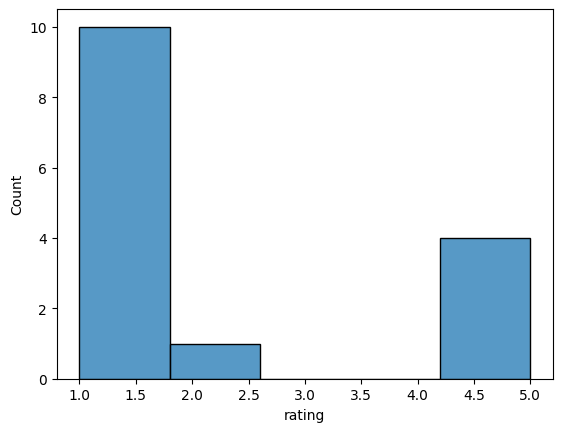

In [96]:
sns.histplot(data=TD_Final_Sent, x='rating')

<Axes: xlabel='sentiment_score', ylabel='Count'>

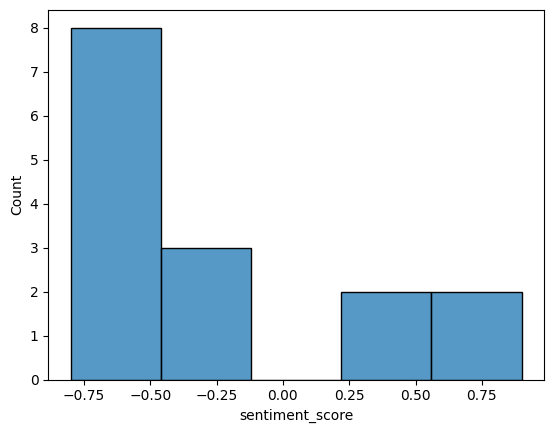

In [97]:
sns.histplot(data=TD_Final_Sent, x='sentiment_score')

<Axes: xlabel='sentiment_magnitude', ylabel='Count'>

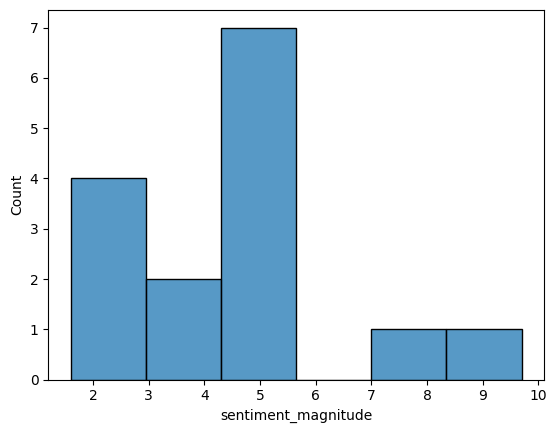

In [98]:
sns.histplot(data=TD_Final_Sent, x='sentiment_magnitude')

# Comparing overall sentiment score and magnitude with the scores from each location

In [106]:
TD_Final_Sent['sentiment_score'].mean()

-0.2066666752099991

In [100]:
TD_Final_Sent.groupby('Location')['sentiment_score'].mean().reset_index()

,Location,sentiment_score
0,"1062 Princess St, Kingston, ON K7L 1H2",-0.44
1,"750 Gardiners Rd, Kingston, ON K7M 3X9",-0.08
2,"TD Canada Trust Branch and ATM, 94 Princess St...",-0.10


In [109]:
TD_Final_Sent['sentiment_magnitude'].mean()

4.299999992052714

In [110]:
TD_Final_Sent.groupby('Location')['sentiment_magnitude'].mean().reset_index()

,Location,sentiment_magnitude
0,"94 Princess St, Kingston, ON K7L 1A5",2.94
1,"1062 Princess St, Kingston, ON K7L 1H2",5.14
2,"750 Gardiners Rd, Kingston, ON K7M 3X9",4.82


In [108]:
TD_Final_Sent['rating'].mean()

2.1333333333333333

In [101]:
TD_Final_Sent.groupby('Location')['rating'].mean().reset_index()

,Location,rating
0,"1062 Princess St, Kingston, ON K7L 1H2",1.0
1,"750 Gardiners Rd, Kingston, ON K7M 3X9",2.8
2,"TD Canada Trust Branch and ATM, 94 Princess St...",2.6


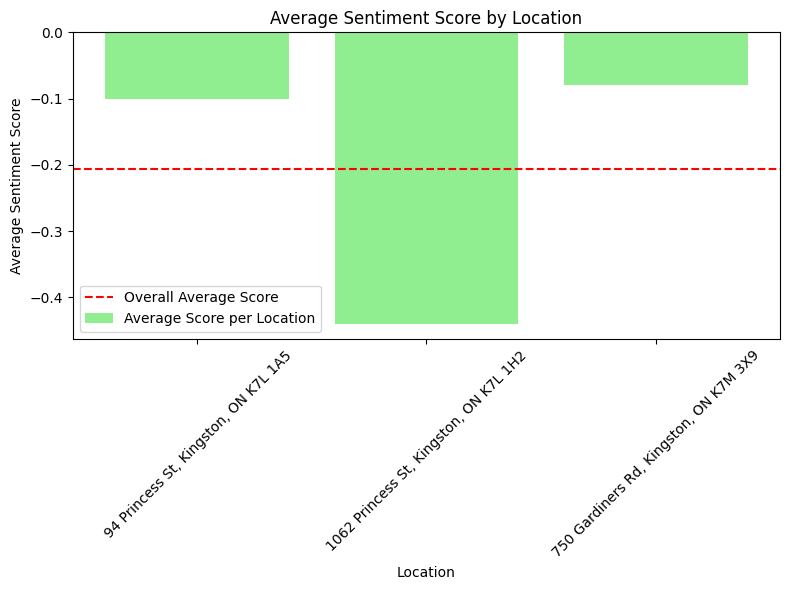

In [135]:
# Calculate average sentiment score for each location
location_avg_score = TD_Final_Sent.groupby('Location')['sentiment_score'].mean().reset_index()

# Calculate overall average sentiment score
overall_avg_score = TD_Final_Sent['sentiment_score'].mean()

# Plot
plt.figure(figsize=(8, 6))

# Plot average score for each location
plt.bar(location_avg_score['Location'], location_avg_score['sentiment_score'], color='lightgreen', label='Average Score per Location')

# Plot overall average score
plt.axhline(y=overall_avg_score, color='red', linestyle='--', label='Overall Average Score')

plt.title('Average Sentiment Score by Location')
plt.xlabel('Location')
plt.ylabel('Average Sentiment Score')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

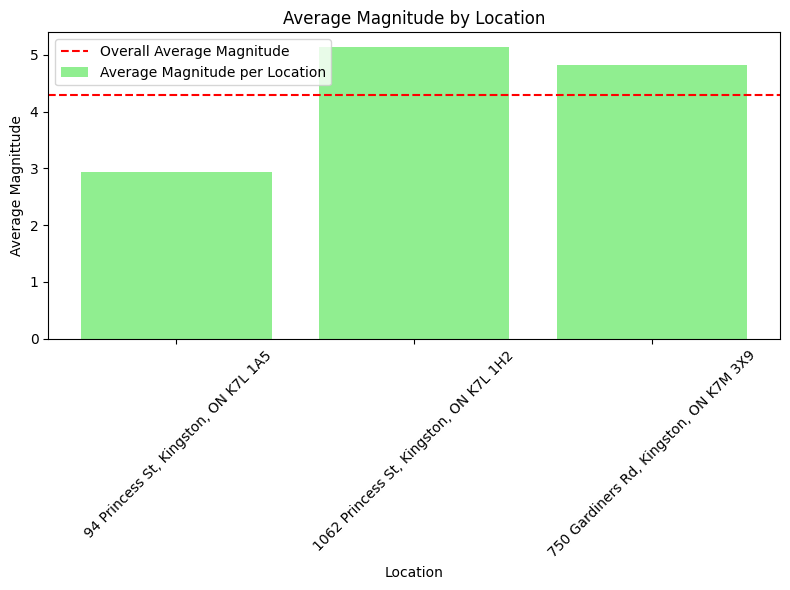

In [133]:
# Calculate average sentiment score for each location
location_avg_score = TD_Final_Sent.groupby('Location')['sentiment_magnitude'].mean().reset_index()

# Calculate overall average sentiment score
overall_avg_score = TD_Final_Sent['sentiment_magnitude'].mean()

# Plot
plt.figure(figsize=(8, 6))

# Plot average score for each location
plt.bar(location_avg_score['Location'], location_avg_score['sentiment_magnitude'], color='lightgreen', label='Average Magnitude per Location')

# Plot overall average score
plt.axhline(y=overall_avg_score, color='red', linestyle='--', label='Overall Average Magnitude')

plt.title('Average Magnitude by Location')
plt.xlabel('Location')
plt.ylabel('Average Magnittude')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

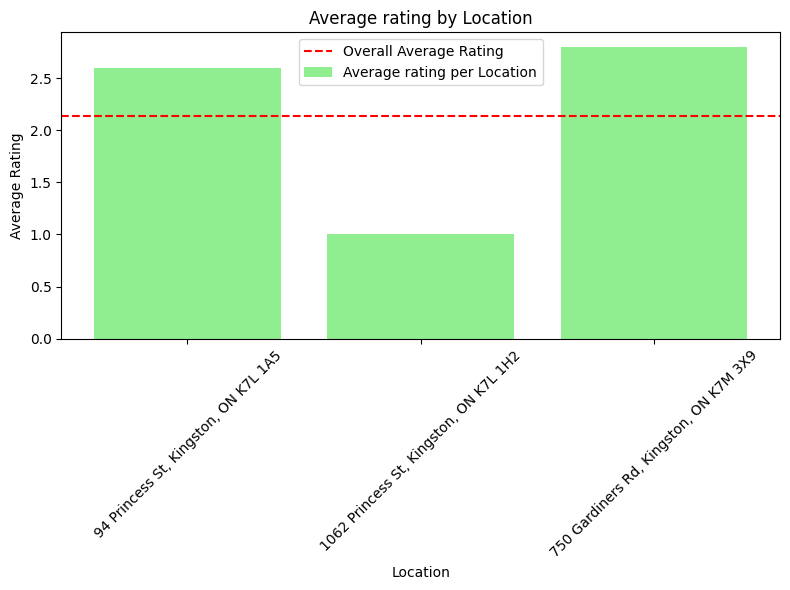

In [134]:
# Calculate average sentiment score for each location
location_avg_score = TD_Final_Sent.groupby('Location')['rating'].mean().reset_index()

# Calculate overall average sentiment score
overall_avg_score = TD_Final_Sent['rating'].mean()

# Plot
plt.figure(figsize=(8, 6))

# Plot average score for each location
plt.bar(location_avg_score['Location'], location_avg_score['rating'], color='lightgreen', label='Average rating per Location')

# Plot overall average score
plt.axhline(y=overall_avg_score, color='red', linestyle='--', label='Overall Average Rating')

plt.title('Average rating by Location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [120]:
numeric_cols = TD_Final_Sent[['sentiment_score', 'sentiment_magnitude', 'rating']]

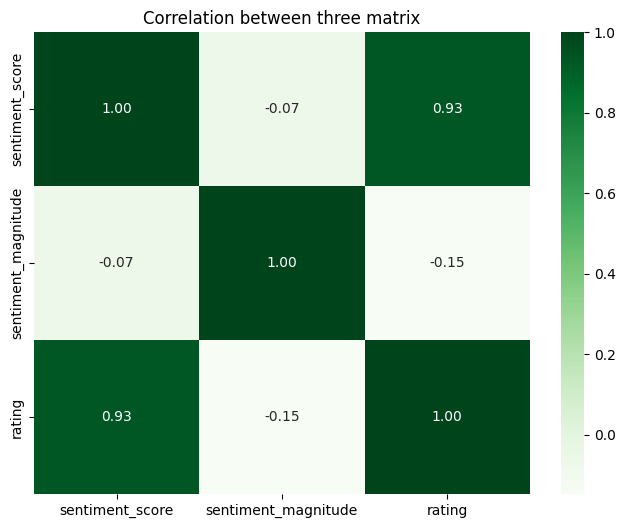

In [140]:
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation between three matrix')
plt.show()

## Findings

#Distribution of Sentiment score, magnitude, and rating

The distributions of sentiment score, magnitude, and rating are not symmetric in shape. This suggests that there is variability in the sentiment expressed in reviews and the ratings assigned to each location.

#Comparing the averages

The average sentiment score across all locations is -0.21, indicating a slightly negative sentiment on average.
The average sentiment magnitude across all locations is 4.30, suggesting that the sentiment expressed in reviews tends to be moderately intense.
The average rating across all locations is 2.13, reflecting a relatively low satisfaction level on average.

#Location-Level Analysis

Location 1: 1062 Princess St, Kingston, ON K7L 1H2
Average Sentiment Score: -0.44 (Below overall average)
Average Sentiment Magnitude: 5.14 (Above overall average)
Average Rating: 1.0 (Below overall average)
Insights: Location 1 exhibits a significantly high sentiment magnitude, indicating intense sentiments expressed in reviews. However, the sentiment score and rating are below the overall averages, suggesting that while customers express strong emotions, they may not be entirely satisfied with their experiences. This location requires close monitoring to address potential issues affecting customer satisfaction.

Location 2: 750 Gardiners Rd, Kingston, ON K7M 3X9
Average Sentiment Score: -0.08 (Above overall average)
Average Sentiment Magnitude: 4.82 (Above overall average)
Average Rating: 2.8 (Above overall average)
Insights: Location 2 demonstrates above-average sentiment score, sentiment magnitude, and rating. Customers at this location express relatively positive sentiments and higher satisfaction levels compared to the overall averages. Continued monitoring is recommended to sustain this positive trend and identify areas for improvement.

Location 3: 94 Princess St, Kingston, ON K7L 1A5
Average Sentiment Score: -0.10 (Above overall average)
Average Sentiment Magnitude: 2.94 (Below overall average)
Average Rating: 2.6 (Above overall average)
Insights: Location 3 has sentiment metrics close to the overall averages, with a slightly higher sentiment score and rating. However, the sentiment magnitude is below the overall average, indicating less intense sentiments expressed in reviews. It's essential to monitor customer feedback closely to ensure consistent satisfaction levels at this location.



#Recommendations
Location 1 requires immediate attention due to below-average sentiment score and rating despite high sentiment magnitude.
Locations 2 and 3 demonstrate a better sentiment and satisfaction levels, but ongoing monitoring is necessary to maintain performance and address any emerging issues. Despite variations in sentiment metrics across locations, all locations show room for improvement as the metrics are still relatively low compared to ideal benchmarks. Implementing strategies to enhance customer experiences and address specific pain points identified in reviews is crucial for overall performance improvement.
